In [15]:
import astropy.coordinates as coord
import astropy.table as at
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import gala.coordinates as gc

In [11]:
tbl = at.Table.read('../SgrTriax_DYN.dat', format='ascii.basic')
tbl = tbl[np.abs(tbl['Pcol']) < 4]

(240, 120)

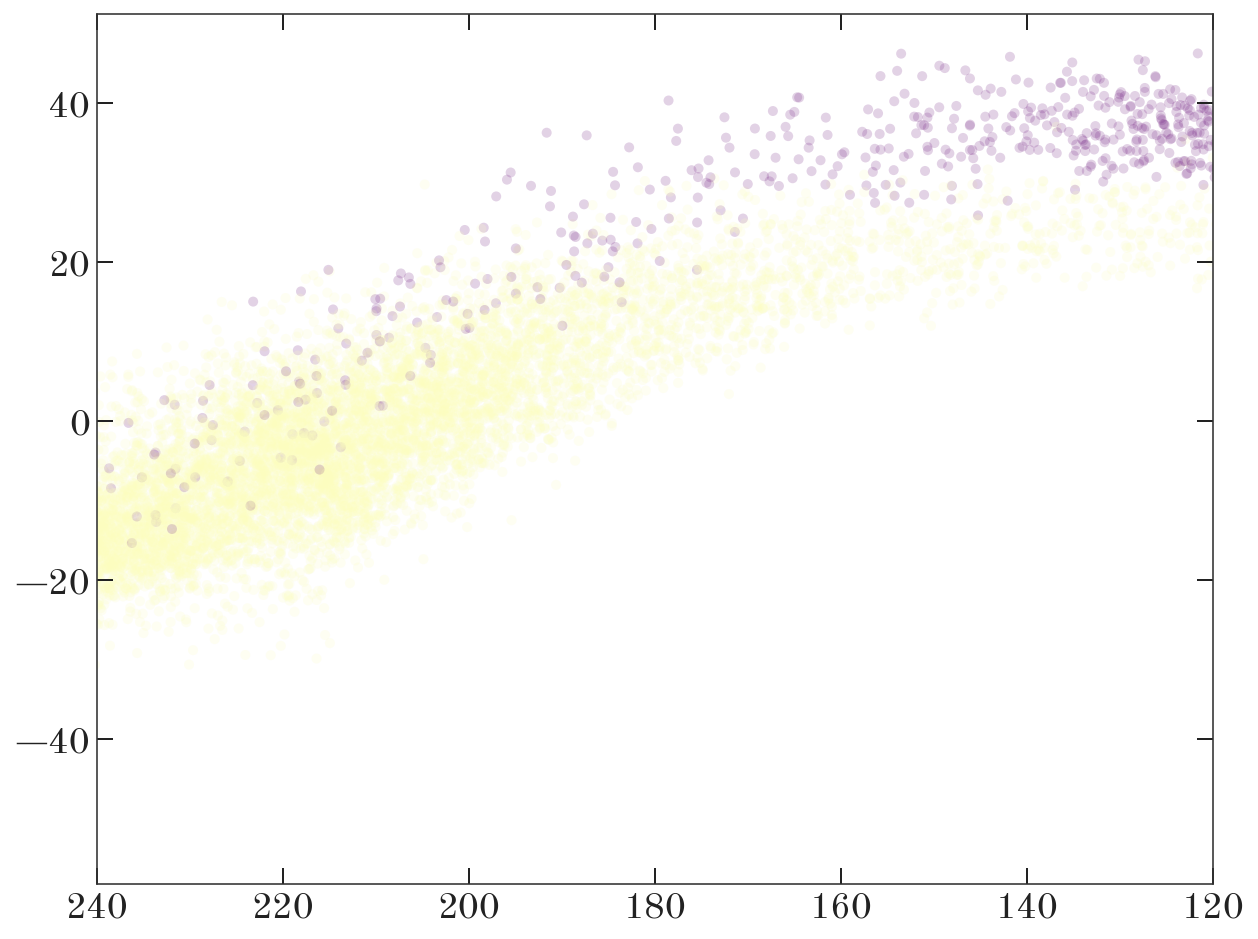

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.scatter(tbl['ra'], tbl['dec'], c=tbl['Lmflag'],
           marker='o', lw=0, alpha=0.2)
# ax.set_ylim(0, 100)
ax.set_xlim(240, 120)

(240, 120)

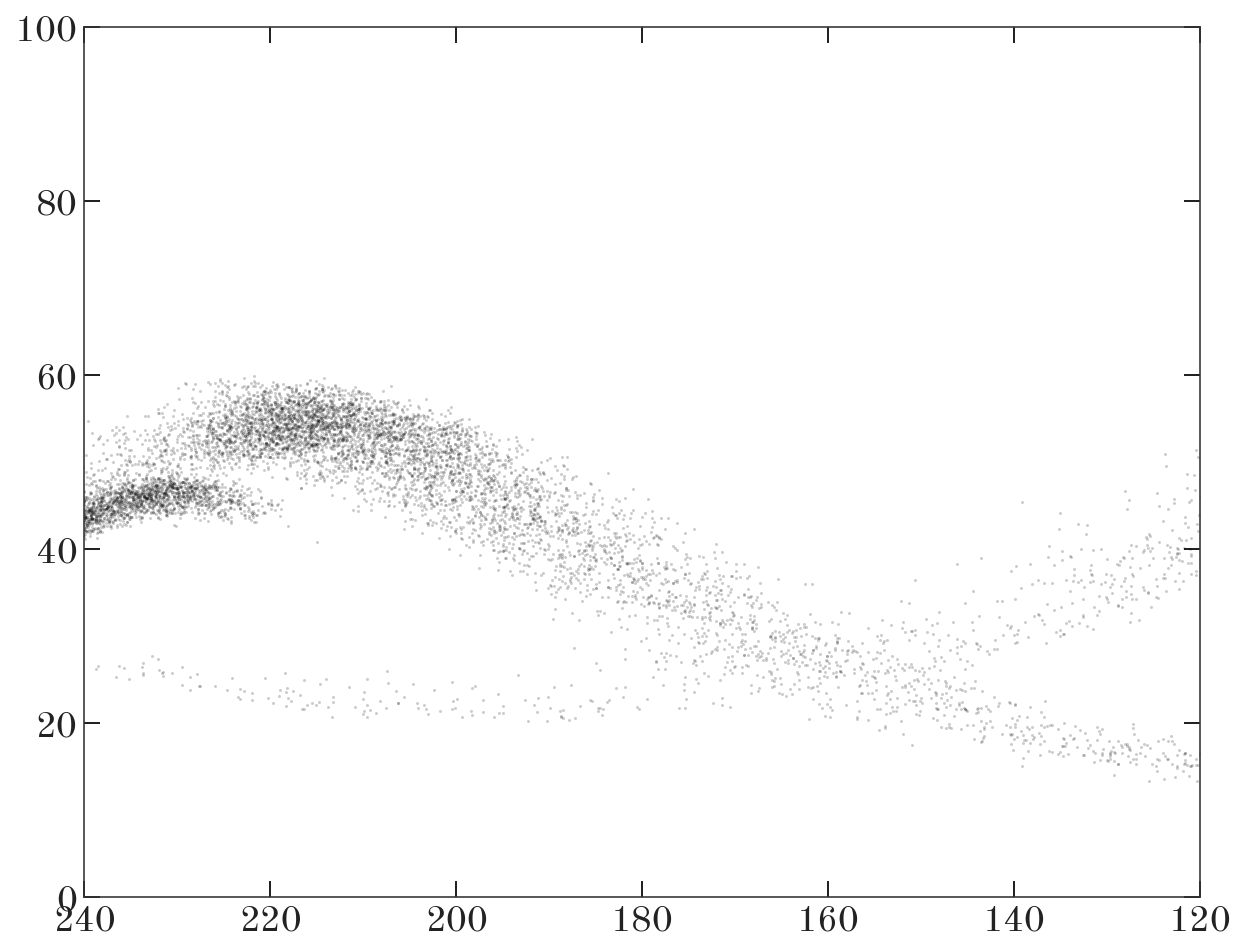

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(tbl['ra'], tbl['dist'],
        marker='o', ls='none', mew=0, ms=1.5, alpha=0.2)
ax.set_ylim(0, 100)
ax.set_xlim(240, 120)

In [23]:
galcen = gc.get_galactocentric2019()
rep = coord.CartesianRepresentation(-tbl['xgc'], tbl['ygc'], tbl['zgc'], unit=u.kpc)
dif = coord.CartesianDifferential(-tbl['u'], tbl['v'], tbl['w'], unit=u.km/u.s)
galcen = galcen.realize_frame(rep.with_differentials(dif))
icrs = galcen.transform_to(coord.ICRS)

(240, 120)

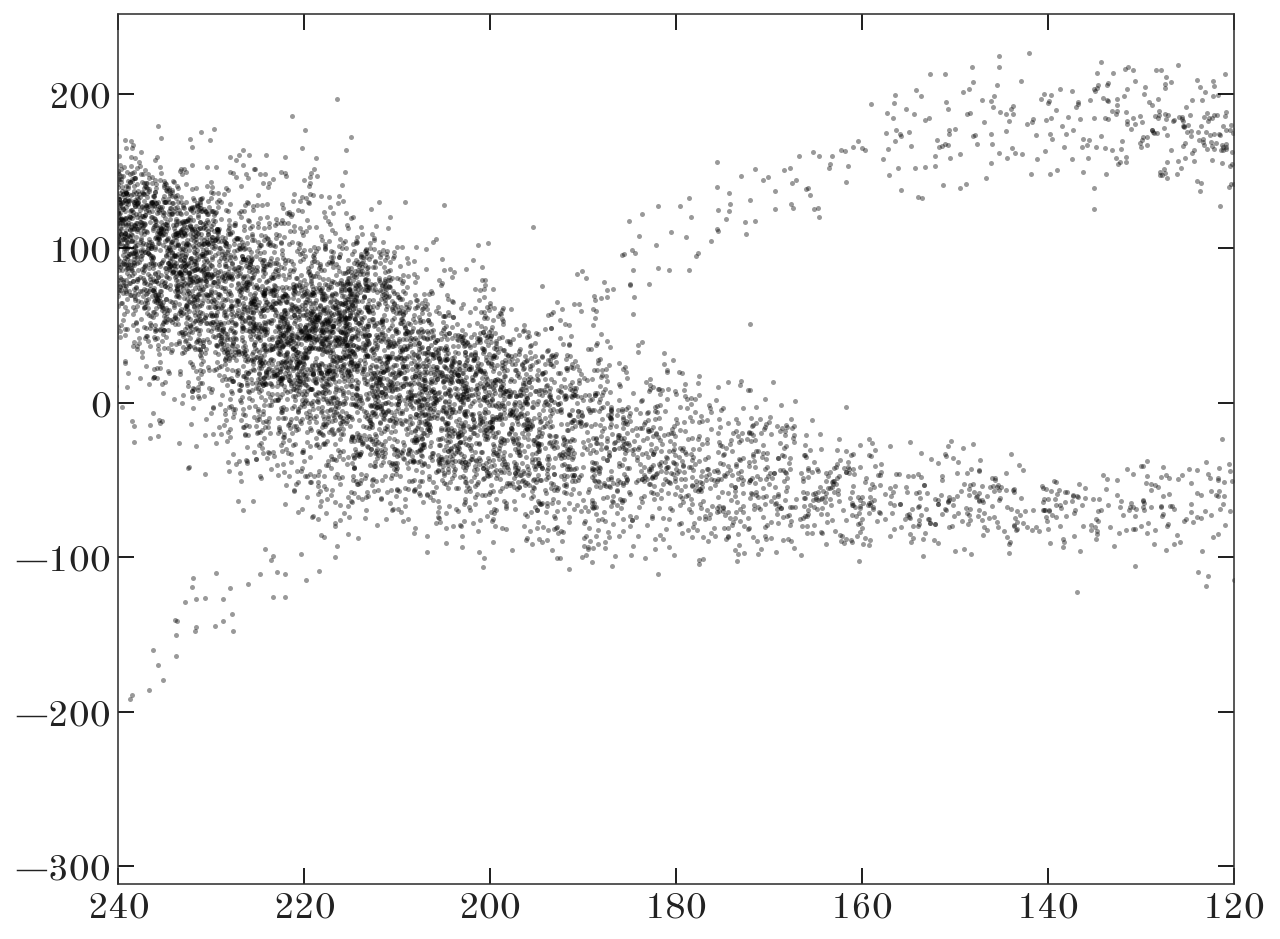

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
ax.plot(icrs.ra.degree, icrs.radial_velocity.value,
        marker='o', ls='none', mew=0, ms=2.5, alpha=0.4)
# ax.set_ylim(0, 100)
ax.set_xlim(240, 120)
# ax.set_xlim(360, 0)